## Imports

In [1]:
# General imports
import time
import json
import random
import os

# Intent recognition imports
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# ChatGPT imports
%load_ext autoreload
%autoreload 2
from gpt import GPT
from settings import Settings
from intent_model import IntentModel

# Chat demo
import gradio as gr

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-29 16:40:05.841368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load data 

In [2]:
# Load the data from JSON file
with open("intent_recognition_v2.json", "r") as f:
    data = json.load(f)

validation_data = []
train_data = []
for datum in data:
    texts = datum["train_questions"]
    label = datum["intent"]
    validation = datum["test_questions"]
    for text in texts:
        train_data.append((text, label))
    for text in validation:
        validation_data.append((text, label))

# Define the mapping between top-level labels and integers
train_label_map = {label: i for i, label in enumerate(set([data[1] for data in train_data]))}
validation_label_map = {label: i for i, label in enumerate(set([data[1] for data in validation_data]))} 

# Convert the training data labels to integers using the label_map
train_labels = torch.tensor([train_label_map[data[1]] for data in train_data])
validation_labels = torch.tensor([validation_label_map[data[1]] for data in validation_data])
    

# Intent recognition model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1, Training Loss: 3.1046557426452637, Validation Loss: 3.132086753845215, Accuracy: 2
Epoch 2, Training Loss: 3.0793545246124268, Validation Loss: 3.1156704425811768, Accuracy: 0
Epoch 3, Training Loss: 3.043367624282837, Validation Loss: 3.0355658531188965, Accuracy: 21
Epoch 4, Training Loss: 3.005720853805542, Validation Loss: 3.130175828933716, Accuracy: 2
Epoch 5, Training Loss: 2.7716784477233887, Validation Loss: 2.856877088546753, Accuracy: 3
Epoch 6, Training Loss: 2.746840476989746, Validation Loss: 3.1501097679138184, Accuracy: 0
Epoch 7, Training Loss: 2.3453328609466553, Validation Loss: 3.1681578159332275, Accuracy: 2
Epoch 8, Training Loss: 2.0071868896484375, Validation Loss: 3.4355576038360596, Accuracy: 0
Early stopping triggered. No improvement in validation loss.


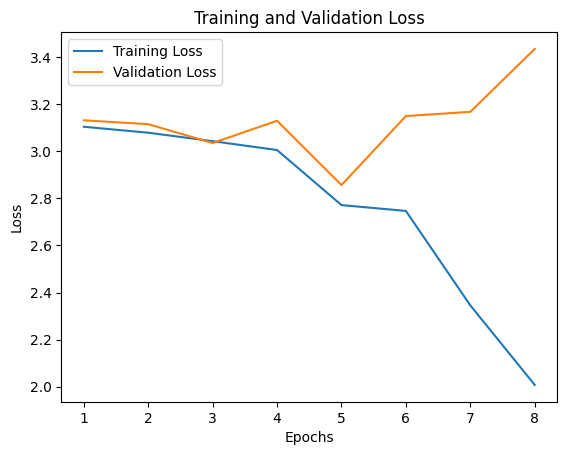

In [4]:
intent_model = IntentModel(train_data, validation_data, train_label_map, train_labels, validation_label_map, validation_labels)

In [ ]:
intent_model = IntentModel(train_data, validation_data, train_label_map, train_labels, validation_label_map, validation_labels).test_best_model()

In [6]:
import pandas as pd

# test the intent model
predicted_intent, confidence_scores = intent_model.get_intent("Can you give me a summary of the privacy policy?")

# Retrieve the intent label and its corresponding confidence score
highest_confidence_intent = predicted_intent

print("Highest confidence intent:", highest_confidence_intent)
print("Highest confidence score:", confidence_scores)
print(len(confidence_scores))
print(len(intent_model.train_label_map.keys()))

pd.DataFrame({
    'keys': intent_model.train_label_map.keys(),
    'confidences': confidence_scores
})

Highest confidence intent: hello_response
Highest confidence score: [0.0004843466158490628, 0.0014553559012711048, 0.001545311650261283, 0.0012906317133456469, 0.0878240317106247, 0.00085000618128106, 0.0009109221282415092, 0.0011904215207323432, 0.0014259230811148882, 0.0004847758973482996, 0.0008768193074502051, 0.00086935143917799, 0.0002947338798549026, 0.0011390491854399443, 0.8768407106399536, 0.0008547102333977818, 0.003964132629334927, 0.0006996628944762051, 0.003189817536622286, 0.013467430137097836, 0.0003418601118028164]
21
21


,keys,confidences
0,refunds_legal_statement,0.000484
1,legal_statement_information,0.001455
2,selling_personal_data,0.001545
3,summarization_legal_statement,0.001291
4,third_parties,0.087824
5,data_collection,0.000850
6,cookie_policy,0.000911
7,thanks_response,0.001190
8,access_personal_data,0.001426
9,delete_personal_information,0.000485


## ChatGPT model

In [66]:
# GPT model here
gpt_model = GPT()

# gpt_model = False

# Test ChatGPT model
# gpt_model.answer_question(question='What is the most important thing I need to know about your privacy statement?')


d:\school\iYYU\gpt.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


# Load Settings class

In [ ]:
settings_model = Settings()

# Test the settings model
# settings_model.update_user_setting("1", "profile_published", False)
settings_model.set_user_calling_card_visibility(user_id = "0", individual_user_id = "2", profile_card_component = "profile_card_component_3_visible", component_state = True)



## Get response using intent

In [68]:
def get_object_by_intent(intent):
    for object in data:
        if object['intent'] == intent:
            return object
    return None

# Set up gradio chat for demo

In [ ]:
theme = gr.themes.Soft(
    primary_hue="orange",
    secondary_hue="orange",
).set(
    body_text_color_dark='*neutral_800',
    background_fill_primary_dark='*neutral_50',
    background_fill_secondary_dark='*neutral_50',
    border_color_accent_dark='*primary_300',
    border_color_primary_dark='*neutral_200',
    color_accent_soft_dark='*primary_50',
    link_text_color_dark='*secondary_600',
    link_text_color_active_dark='*secondary_600',
    link_text_color_hover_dark='*secondary_700',
    link_text_color_visited_dark='*secondary_500',
    block_background_fill='*neutral_100',
    block_background_fill_dark='*neutral_100',
    block_label_background_fill='*primary_400',
    block_label_background_fill_dark='*primary_400',
    block_label_text_color='*neutral_50',
    block_label_text_color_dark='*neutral_50',
    block_title_text_color='*neutral_50',
    block_title_text_color_dark='*neutral_50',
    checkbox_background_color_dark='*background_fill_primary',
    checkbox_background_color_selected='*primary_500',
    checkbox_background_color_selected_dark='*primary_500',
    checkbox_border_color_dark='*neutral_100',
    checkbox_border_color_focus='*primary_300',
    checkbox_border_color_focus_dark='*primary_300',
    checkbox_border_color_hover_dark='*neutral_300',
    checkbox_border_color_selected='*primary_500',
    checkbox_border_color_selected_dark='*primary_500',
    checkbox_border_width_dark='1px',
    checkbox_label_background_fill_selected_dark='*primary_500',
    checkbox_label_text_color_selected_dark='white',
    error_background_fill_dark='#fee2e2',
    error_border_color_dark='#fecaca',
    input_background_fill_dark='white',
    input_background_fill_focus_dark='*secondary_500',
    input_border_color_dark='*neutral_50',
    input_border_color_focus_dark='*secondary_300',
    input_placeholder_color_dark='*neutral_400',
    slider_color_dark='*primary_500',
    stat_background_fill_dark='*primary_300',
    table_border_color_dark='*neutral_300',
    table_even_background_fill_dark='white',
    table_odd_background_fill_dark='*neutral_50',
    button_primary_background_fill_dark='*primary_500',
    button_primary_background_fill_hover_dark='*primary_400',
    button_primary_border_color_dark='*primary_200',
    button_secondary_background_fill_dark='white',
    button_secondary_background_fill_hover_dark='*neutral_100',
    button_secondary_border_color_dark='*neutral_200',
    button_secondary_text_color_dark='*neutral_800'
)

with gr.Blocks(theme=theme, css="chat/chat.css") as demo:
    gr.Image("https://iyyu.com/_nuxt/img/navbar_logoW@2x.79eba99.png", interactive=False,
             tool="image", show_label=False, elem_classes="logo").style(width=200)
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    submit = gr.Button("Submit")

    def user(user_message, history):
        return "", history + [[user_message, None]]

    def bot(history):
        user_message = history[-1][0]

        intent, confidence_score = intent_model.get_intent(question=user_message)
        print('intent:', intent)
        print('confidence:', confidence_score)

        confidence_score = max(confidence_score)

        intent = get_object_by_intent(intent)


        # generating a response with GPT if the main intent was 'privacy_policy' or 'legal_statement'
        use_gpt = intent['use_gpt']
        generate_context = True

        # if the intent is 'privacy_policy' or 'legal_statement', use GPT to generate a response
        response = ('(ChatGPT - intent found: {}): \n{}'.format(intent['intent'], gpt_model.answer_question(question=user_message))
                    if use_gpt else
                    '<em><strong>(intent found ({}): {}):</strong></em> \n{}'.format(confidence_score, intent['intent'], intent['responses'][0]))
        # response = '(ChatGPT - intent found: {}): \n{}'.format(intent['intent'], gpt_model.answer_question(question=user_message)) if use_gpt else '(intent found: {}): \n{}'.format(intent['intent'], intent['responses'][0])

        # response = random.choice(response_map[intent])
        history[-1][1] = response
        # The sleep is to simulate a more natural conversation
        if not use_gpt:
            time.sleep(1)
        return history

    msg.submit(user, [msg, chatbot], [msg, chatbot], queue=False).then(
        bot, chatbot, chatbot
    )
    submit.click(user, [msg, chatbot], [msg, chatbot], queue=False).then(
        bot, chatbot, chatbot
    )

demo.launch()
